In [1]:
# importing the important libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os

In [2]:
# import all the files:
files = [file for file in os.listdir(r'mini project')]

sales_df = pd.DataFrame()

for file in files:
    df = pd.read_csv('mini project/'+file)
    sales_df = pd.concat([sales_df,df])

In [3]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [5]:
# checking all the information :
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [6]:
# checking the nulls:
sales_df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
# changing the columns: To have more eaiser to understand
df = sales_df.columns.str.lower().str.replace(" ","_")

In [8]:
df

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address'],
      dtype='object')

In [9]:
sales_df.columns = df
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          186305 non-null  object
 1   product           186305 non-null  object
 2   quantity_ordered  186305 non-null  object
 3   price_each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   purchase_address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [10]:
# CLEANING THE DATASET:
sales_df["order_id"].nunique

<bound method IndexOpsMixin.nunique of 0        176558
1           NaN
2        176559
3        176560
4        176560
          ...  
11681    259353
11682    259354
11683    259355
11684    259356
11685    259357
Name: order_id, Length: 186850, dtype: object>

In [11]:
sales_df[sales_df["order_id"]=="Order ID"]

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
sales_df.drop(sales_df[sales_df["order_id"]=="Order ID"].index, inplace=True)

In [13]:
sales_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [14]:
sales_df.drop(sales_df[sales_df.isna().any(axis=1)].index, inplace=True)
sales_df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [15]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177815 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          177815 non-null  object
 1   product           177815 non-null  object
 2   quantity_ordered  177815 non-null  object
 3   price_each        177815 non-null  object
 4   order_date        177815 non-null  object
 5   purchase_address  177815 non-null  object
dtypes: object(6)
memory usage: 9.5+ MB


In [16]:
# Change the object type columns into integer type or float type.
convert = ['order_id','quantity_ordered','price_each']
for col in convert:
    sales_df[col] = sales_df[col].astype("float64")
sales_df.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177815 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          177815 non-null  float64
 1   product           177815 non-null  object 
 2   quantity_ordered  177815 non-null  float64
 3   price_each        177815 non-null  float64
 4   order_date        177815 non-null  object 
 5   purchase_address  177815 non-null  object 
dtypes: float64(3), object(3)
memory usage: 9.5+ MB


In [17]:
# Get the month value from date:
sales_df["month"] = sales_df["order_date"].str[0:2].astype("int64")

In [18]:
sales_df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
11681,259353.0,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
11682,259354.0,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
11683,259355.0,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
11684,259356.0,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [19]:
# which have the most productive month in terms of sales
sales_df["month"].unique()

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10], dtype=int64)

In [20]:
sales_df["sales"] = sales_df["quantity_ordered"]*sales_df['price_each']
sales_df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
11681,259353.0,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354.0,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355.0,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356.0,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [21]:
result = sales_df.groupby('month').sum()
result

,order_id,quantity_ordered,price_each,sales
month,,,,
1,1.346100e+09,10319.0,1708642.98,1718766.59
2,1.773932e+09,12759.0,2076331.39,2089066.70
3,2.448128e+09,16210.0,2663790.49,2678969.22
4,3.250017e+09,19708.0,3229535.37,3252081.12
5,3.201084e+09,17858.0,2993644.80,3010315.13
6,2.788652e+09,14496.0,2421606.34,2436539.61
7,3.128963e+09,15316.0,2495227.11,2509243.23
8,2.749218e+09,12770.0,2101268.54,2114102.03
9,2.797131e+09,12424.0,1981517.72,1993594.59


Text(0, 0.5, 'TOTAL SALES')

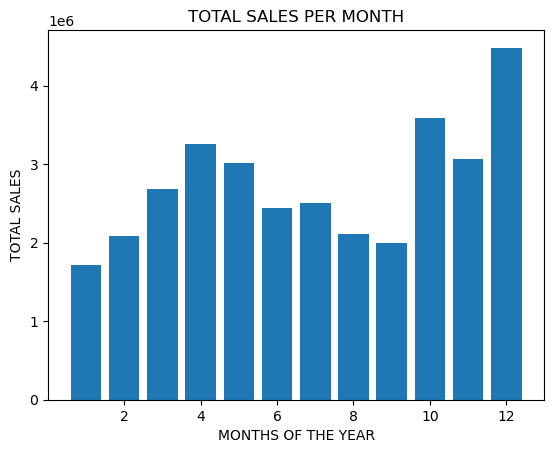

In [22]:
Months = range(1,13)
results = sales_df.groupby('month').sum()
plt.bar(Months, results['sales'])
plt.title('TOTAL SALES PER MONTH')
plt.xlabel('MONTHS OF THE YEAR')
plt.ylabel('TOTAL SALES')

In [23]:
# Which city has the highest number of sales?
sales_df['city'] = sales_df['purchase_address'].apply(lambda x:x.split(',')[1])
sales_df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353.0,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
11682,259354.0,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
11683,259355.0,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
11684,259356.0,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [24]:
sales_df.groupby('city').sum()

,order_id,quantity_ordered,price_each,month,sales
city,,,,,
Atlanta,3.278801e+09,15860.0,2648143.07,100505,2663259.31
Austin,2.184365e+09,10659.0,1728854.34,67006,1738084.50
Boston,4.391441e+09,21484.0,3482987.79,134888,3505993.43
Dallas,3.278213e+09,16051.0,2634400.61,100477,2649326.26
Los Angeles,6.516508e+09,31810.0,5176472.09,199484,5205820.34
New York City,5.493383e+09,26714.0,4430062.37,168550,4457956.20
Portland,2.747545e+09,13420.0,2200813.15,84130,2212579.39
San Francisco,9.867982e+09,48073.0,7835830.56,302391,7884691.75
Seattle,3.267881e+09,15861.0,2614841.30,100717,2628407.58


Text(0.5, 1.0, 'SALES PER CITY')

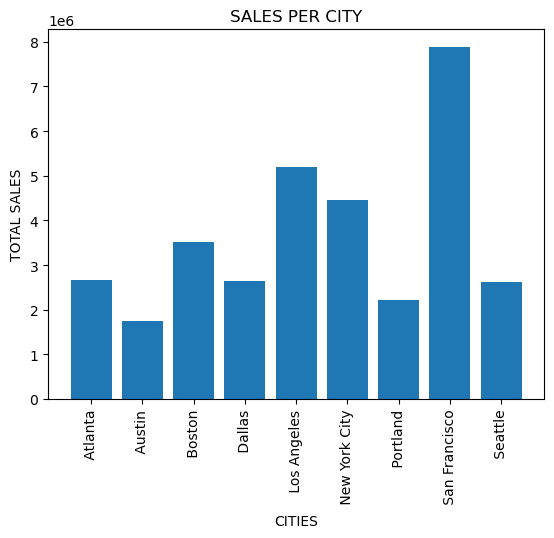

In [25]:
cities = [city for city, df in sales_df.groupby('city')]
results = sales_df.groupby('city').sum()
plt.bar(cities, results['sales'])
plt.xlabel('CITIES')
plt.ylabel('TOTAL SALES')
plt.xticks(cities,rotation='vertical')
plt.title('SALES PER CITY')

SAN FRANCISCO have highest number of sales.

In [26]:
# At what time purchase more products?
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'])
sales_df['hours'] = sales_df['order_date'].dt.hour
sales_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hours
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [27]:
sales_df['hours'].unique()

array([ 8, 22, 14,  9, 13,  7, 10, 17, 12, 19, 15, 20, 18,  0, 11, 23, 21,
        4, 16,  5,  2,  1,  6,  3], dtype=int64)

In [28]:
sales_df.groupby('hours').sum()

,order_id,quantity_ordered,price_each,month,sales
hours,,,,,
0,8.650789e+08,4250.0,674415.57,26485,678739.34
1,5.212370e+08,2508.0,433427.36,16015,435728.66
2,2.710298e+08,1346.0,228996.48,8118,229986.49
3,1.855150e+08,893.0,138547.39,5729,139572.88
4,1.907570e+08,894.0,157030.68,5907,157590.82
5,2.916827e+08,1427.0,219975.12,8938,220997.44
6,5.493646e+08,2698.0,427276.05,16869,430313.34
7,8.919960e+08,4358.0,711855.78,27647,716051.26
8,1.380135e+09,6721.0,1149344.60,42034,1155491.86


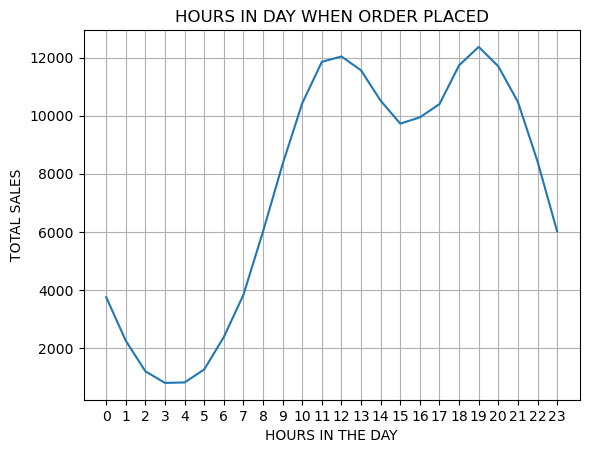

In [29]:
hrs = [hr for hr, df in sales_df.groupby('hours')]
results = sales_df.groupby('hours').count()
plt.plot(hrs,results['sales'])
plt.xlabel('HOURS IN THE DAY')
plt.ylabel('TOTAL SALES')
plt.xticks(hrs)
plt.title('HOURS IN DAY WHEN ORDER PLACED')
plt.grid()

In [30]:
# What is the average purchase by city
sales_df.groupby('city')['sales'].mean().sort_values(ascending=False)

city
 New York City    187.450854
 Atlanta          187.237016
 Dallas           186.454097
 Seattle          186.134663
 Portland         185.587937
 Boston           184.399802
 San Francisco    184.277742
 Los Angeles      184.003264
 Austin           183.632805
Name: sales, dtype: float64

Text(0, 0.5, 'AVERAGE OF PURCHASING')

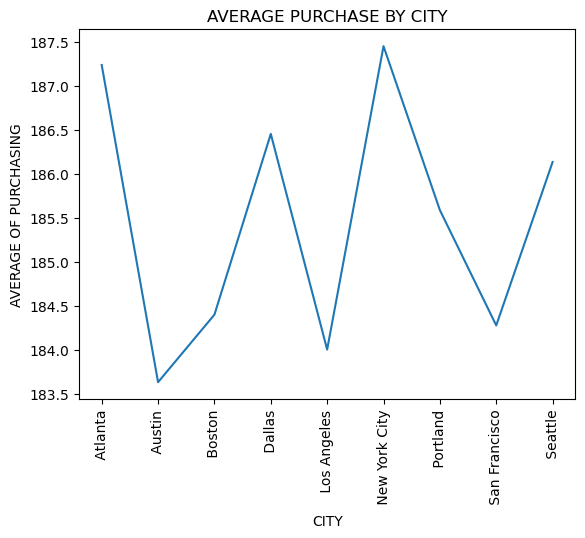

In [31]:
plt.plot(sales_df.groupby('city')['sales'].mean())
plt.title('AVERAGE PURCHASE BY CITY')
plt.xlabel('CITY')
plt.xticks(rotation='vertical')
plt.ylabel('AVERAGE OF PURCHASING')

In [32]:
# Which product have highest sale?
sales_df.groupby('product').sum()

,order_id,quantity_ordered,price_each,month,sales,hours
product,,,,,,
20in Monitor,9.108034e+08,3949.0,431490.77,28128,434350.51,56240
27in 4K Gaming Monitor,1.379761e+09,5965.0,2321610.47,42528,2326290.35,86615
27in FHD Monitor,1.654231e+09,7242.0,1080077.99,50399,1086227.58,103193
34in Ultrawide Monitor,1.356941e+09,5917.0,2241941.00,41487,2248400.83,84965
AA Batteries (4-pack),4.541626e+09,26435.0,75578.88,139392,101510.40,285488
AAA Batteries (4-pack),4.569098e+09,29711.0,59091.37,140528,88835.89,284792
Apple Airpods Headphones,3.421931e+09,14955.0,2226900.00,104777,2243250.00,213061
Bose SoundSport Headphones,2.945387e+09,12877.0,1275372.45,90399,1287571.23,184341
Flatscreen TV,1.062084e+09,4600.0,1374600.00,32751,1380000.00,65689


Text(0.5, 1.0, 'SALES PER PRODUCT')

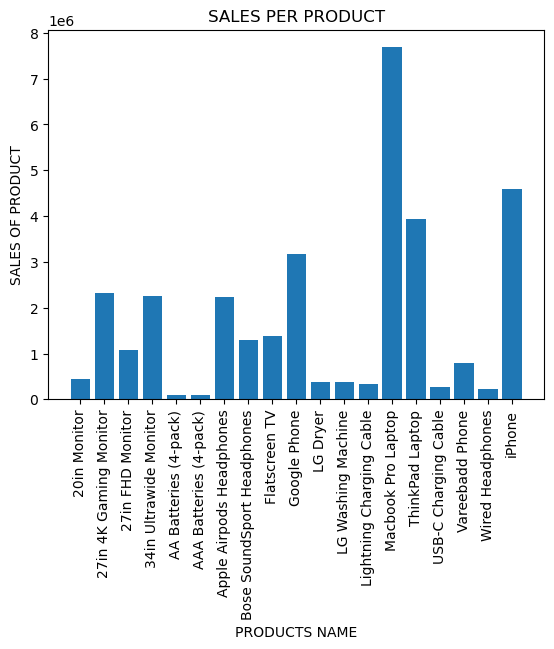

In [33]:
prds = [prd for prd, df in sales_df.groupby('product')]
results = sales_df.groupby('product').sum()
plt.bar(prds, results['sales'])
plt.xlabel('PRODUCTS NAME')
plt.xticks(prds, rotation='vertical')
plt.ylabel('SALES OF PRODUCT')
plt.title('SALES PER PRODUCT')


In [34]:
sep = sales_df[sales_df['month']==9]
sep

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hours
2251,238834.0,Apple Airpods Headphones,1.0,150.00,2019-09-01 04:13:00,"761 Forest St, San Francisco, CA 94016",9,150.00,San Francisco,4
2731,239285.0,34in Ultrawide Monitor,1.0,379.99,2019-09-01 01:09:00,"373 1st St, San Francisco, CA 94016",9,379.99,San Francisco,1
4124,240636.0,Lightning Charging Cable,1.0,14.95,2019-09-01 02:07:00,"63 1st St, Seattle, WA 98101",9,14.95,Seattle,2
4569,241054.0,AAA Batteries (4-pack),1.0,2.99,2019-09-01 00:25:00,"175 South St, San Francisco, CA 94016",9,2.99,San Francisco,0
5914,242343.0,ThinkPad Laptop,1.0,999.99,2019-09-01 02:44:00,"510 Park St, Boston, MA 02215",9,999.99,Boston,2
...,...,...,...,...,...,...,...,...,...,...
11681,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
11682,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
11683,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
11684,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [35]:
c = sep.groupby('product')['sales'].sum().sort_values()
c

product
AAA Batteries (4-pack)          5483.66
AA Batteries (4-pack)           6332.16
Wired Headphones               14771.68
LG Dryer                       16200.00
USB-C Charging Cable           18140.10
Lightning Charging Cable       20451.60
LG Washing Machine             27000.00
20in Monitor                   28267.43
Vareebadd Phone                46000.00
27in FHD Monitor               69145.39
Bose SoundSport Headphones     78692.13
Flatscreen TV                  82200.00
34in Ultrawide Monitor        136796.40
Apple Airpods Headphones      137550.00
27in 4K Gaming Monitor        141566.37
Google Phone                  196800.00
ThinkPad Laptop               232997.67
iPhone                        266000.00
Macbook Pro Laptop            469200.00
Name: sales, dtype: float64

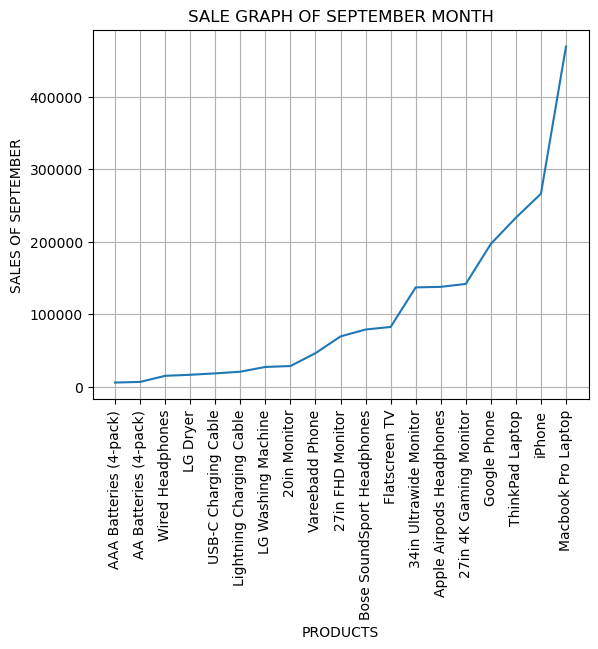

In [36]:
plt.plot(sep.groupby('product')['sales'].sum().sort_values())
plt.title('SALE GRAPH OF SEPTEMBER MONTH')
plt.xlabel('PRODUCTS')
plt.xticks(rotation='vertical')
plt.ylabel('SALES OF SEPTEMBER')
plt.grid()